<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Regular_Season_Batter" data-toc-modified-id="Regular_Season_Batter-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regular_Season_Batter</a></span></li><li><span><a href="#preprocessing" data-toc-modified-id="preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>preprocessing</a></span><ul class="toc-item"><li><span><a href="#pre_season_concat" data-toc-modified-id="pre_season_concat-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>pre_season_concat</a></span></li><li><span><a href="#weight,-height" data-toc-modified-id="weight,-height-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>weight, height</a></span></li><li><span><a href="#키몸무게-결측치-채우기" data-toc-modified-id="키몸무게-결측치-채우기-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>키몸무게 결측치 채우기</a></span></li><li><span><a href="#age" data-toc-modified-id="age-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>age</a></span></li><li><span><a href="#starting-salary" data-toc-modified-id="starting-salary-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>starting salary</a></span></li><li><span><a href="#Lag_n" data-toc-modified-id="Lag_n-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Lag_n</a></span></li><li><span><a href="#통산-data" data-toc-modified-id="통산-data-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>통산 data</a></span></li><li><span><a href="#누적-시즌-참여-횟수" data-toc-modified-id="누적-시즌-참여-횟수-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>누적 시즌 참여 횟수</a></span></li><li><span><a href="#시즌별-최대-연속-출장-경기" data-toc-modified-id="시즌별-최대-연속-출장-경기-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>시즌별 최대 연속 출장 경기</a></span></li><li><span><a href="#역대-OPS-추세" data-toc-modified-id="역대-OPS-추세-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>역대 OPS 추세</a></span></li><li><span><a href="#역대-OBP-추세" data-toc-modified-id="역대-OBP-추세-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>역대 OBP 추세</a></span></li><li><span><a href="#역대-SLG-추세" data-toc-modified-id="역대-SLG-추세-2.12"><span class="toc-item-num">2.12&nbsp;&nbsp;</span>역대 SLG 추세</a></span></li><li><span><a href="#역대-OPS-상승-수-하락-수" data-toc-modified-id="역대-OPS-상승-수-하락-수-2.13"><span class="toc-item-num">2.13&nbsp;&nbsp;</span>역대 OPS 상승 수 하락 수</a></span></li><li><span><a href="#역대-OBP-상승-수-하락-수" data-toc-modified-id="역대-OBP-상승-수-하락-수-2.14"><span class="toc-item-num">2.14&nbsp;&nbsp;</span>역대 OBP 상승 수 하락 수</a></span></li><li><span><a href="#역대-SLG-상승-수-하락-수" data-toc-modified-id="역대-SLG-상승-수-하락-수-2.15"><span class="toc-item-num">2.15&nbsp;&nbsp;</span>역대 SLG 상승 수 하락 수</a></span></li><li><span><a href="#Career-개수" data-toc-modified-id="Career-개수-2.16"><span class="toc-item-num">2.16&nbsp;&nbsp;</span>Career 개수</a></span></li><li><span><a href="#Career-고졸,-대졸-여부" data-toc-modified-id="Career-고졸,-대졸-여부-2.17"><span class="toc-item-num">2.17&nbsp;&nbsp;</span>Career 고졸, 대졸 여부</a></span></li><li><span><a href="#지난-시즌-팀별-투수-순위" data-toc-modified-id="지난-시즌-팀별-투수-순위-2.18"><span class="toc-item-num">2.18&nbsp;&nbsp;</span>지난 시즌 팀별 투수 순위</a></span></li><li><span><a href="#Split-position" data-toc-modified-id="Split-position-2.19"><span class="toc-item-num">2.19&nbsp;&nbsp;</span>Split position</a></span></li><li><span><a href="#국내파,-해외파" data-toc-modified-id="국내파,-해외파-2.20"><span class="toc-item-num">2.20&nbsp;&nbsp;</span>국내파, 해외파</a></span></li><li><span><a href="#전-시즌-데이터-사용" data-toc-modified-id="전-시즌-데이터-사용-2.21"><span class="toc-item-num">2.21&nbsp;&nbsp;</span>전 시즌 데이터 사용</a></span></li><li><span><a href="#전-시즌-데이터-추세" data-toc-modified-id="전-시즌-데이터-추세-2.22"><span class="toc-item-num">2.22&nbsp;&nbsp;</span>전 시즌 데이터 추세</a></span></li><li><span><a href="#Autocorrelation" data-toc-modified-id="Autocorrelation-2.23"><span class="toc-item-num">2.23&nbsp;&nbsp;</span>Autocorrelation</a></span></li><li><span><a href="#Position,-team" data-toc-modified-id="Position,-team-2.24"><span class="toc-item-num">2.24&nbsp;&nbsp;</span>Position, team</a></span></li><li><span><a href="#Missing-value" data-toc-modified-id="Missing-value-2.25"><span class="toc-item-num">2.25&nbsp;&nbsp;</span>Missing value</a></span></li><li><span><a href="#Drop-feature" data-toc-modified-id="Drop-feature-2.26"><span class="toc-item-num">2.26&nbsp;&nbsp;</span>Drop feature</a></span></li></ul></li></ul></div>

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

import xgboost as xgb

In [4]:
def dummy_feature(df, variables):
    dummies = pd.DataFrame()
    for var in variables:
        dummy = pd.get_dummies(df[var], prefix=var, drop_first=True)
        dummies = pd.concat([dummies, dummy], axis=1)
    df = pd.concat([df, dummies], axis=1)
    return df

# Regular_Season_Batter

In [5]:
data1 = pd.read_csv('../dataset/Regular_Season_Batter.csv', index_col=0)
data2 = pd.read_csv('../dataset/Regular_Season_Batter_Day_by_Day.csv', index_col=0)

data_temp = data1.copy()
data1.shape

(2454, 28)

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2454 entries, 0 to 344
Data columns (total 28 columns):
batter_name        2454 non-null object
year               2454 non-null int64
team               2454 non-null object
avg                2428 non-null float64
G                  2454 non-null int64
AB                 2454 non-null int64
R                  2454 non-null int64
H                  2454 non-null int64
2B                 2454 non-null int64
3B                 2454 non-null int64
HR                 2454 non-null int64
TB                 2454 non-null int64
RBI                2454 non-null int64
SB                 2454 non-null int64
CS                 2454 non-null int64
BB                 2454 non-null int64
HBP                2454 non-null int64
SO                 2454 non-null int64
GDP                2454 non-null int64
SLG                2428 non-null float64
OBP                2430 non-null float64
E                  2454 non-null int64
height/weight      1652 non-

# preprocessing

## pre_season_concat
- 0: pre_season, 1: regular_season

In [16]:
def pre_season_concat(data):
    pre = pd.read_csv('../dataset/Pre_Season_Batter.csv', index_col=0)
    pre.loc[:,'season'] = '0'
    data.loc[:,'season'] = '1'
    data = pd.concat([data,pre], axis=0)
    return data

In [17]:
data_temp = data1.copy()
data_temp = pre_season_concat(data_temp)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3847 entries, 0 to 344
Data columns (total 29 columns):
batter_name        3847 non-null object
year               3847 non-null int64
team               3847 non-null object
avg                3821 non-null object
G                  3847 non-null int64
AB                 3847 non-null int64
R                  3847 non-null int64
H                  3847 non-null int64
2B                 3847 non-null int64
3B                 3847 non-null int64
HR                 3847 non-null int64
TB                 3847 non-null int64
RBI                3847 non-null int64
SB                 3847 non-null int64
CS                 3847 non-null int64
BB                 3847 non-null int64
HBP                3847 non-null int64
SO                 3847 non-null int64
GDP                3847 non-null int64
SLG                3792 non-null float64
OBP                3798 non-null float64
E                  3847 non-null int64
height/weight      3045 non-n

## weight, height
- 키, 몸무게가 결측치인 선수가 101명...

In [11]:
def weight_height_(data):
    data.loc[:, 'height'] = data['height/weight'].apply(lambda x: np.nan if str(x) == 'nan' else x.split('/')[0][:3]).astype(float)
    data.loc[:, 'weight'] = data['height/weight'].apply(lambda x: np.nan if str(x) == 'nan' else x.split('/')[1][:-2]).astype(float)
    data.height = data.height.fillna(np.median(data.height.dropna()))
    data.weight = data.weight.fillna(np.median(data.weight.dropna()))
    data = data.drop('height/weight', axis=1)
    return data

In [12]:
data_temp[data_temp['height/weight'].isnull()]['batter_name'].nunique()

101

In [13]:
data_temp = weight_height_(data_temp)

## 키몸무게 결측치 채우기

In [70]:
def height_weight_fillna(data):
    h_w_df = pd.read_csv('../dataset/batter_height_weight.csv')
    h_w_df.loc[:,'height'] = h_w_df.height.apply(lambda x: str(x)[:-2] + 'cm' if str(x)!='nan' else x)
    h_w_df.loc[:,'weight'] = h_w_df.weight.apply(lambda x: str(x)[:-2] + 'kg' if str(x)!='nan' else x)
    h_w_df.loc[:,'height/weight'] = h_w_df[['height','weight']].apply(lambda x: str(x[0]) + '/' + str(x[1]) if str(x[0]) != 'nan' else np.nan, axis=1)

    null_names = data[data['height/weight'].isnull()].batter_name.unique()
    for name in null_names:
        data.loc[data.batter_name==name,'height/weight'] = h_w_df.loc[h_w_df.batter_name==name,'height/weight'].iloc[0]
    return data

In [72]:
data_temp = data1.copy()
data_temp = height_weight_fillna(data_temp)
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2454 entries, 0 to 344
Data columns (total 28 columns):
batter_name        2454 non-null object
year               2454 non-null int64
team               2454 non-null object
avg                2428 non-null float64
G                  2454 non-null int64
AB                 2454 non-null int64
R                  2454 non-null int64
H                  2454 non-null int64
2B                 2454 non-null int64
3B                 2454 non-null int64
HR                 2454 non-null int64
TB                 2454 non-null int64
RBI                2454 non-null int64
SB                 2454 non-null int64
CS                 2454 non-null int64
BB                 2454 non-null int64
HBP                2454 non-null int64
SO                 2454 non-null int64
GDP                2454 non-null int64
SLG                2428 non-null float64
OBP                2430 non-null float64
E                  2454 non-null int64
height/weight      2423 non-

## age

In [8]:
def age_(data):
    data['age'] = data.year - data.year_born.apply(lambda x: int(x[:4]))
    data = data.drop('year_born', axis=1)
    return data

In [9]:
data_temp = age_(data_temp)

## starting salary

In [10]:
def starting_salary_(data):
    data.starting_salary = data.starting_salary.apply(lambda x: x[:-2] if str(x)!='nan' else np.nan).astype(float)
    data.starting_salary = data.starting_salary.fillna(np.median(data.starting_salary.dropna()))
    return data

In [11]:
data_temp = starting_salary_(data_temp)

## Lag_n

In [193]:
def lag_n(data,name,year,var_name,lag_num=1):
    if len(data.loc[(data['batter_name']==name)&(data['year']==year-lag_num),var_name])==0:
        return np.nan
    else:
        return data.loc[(data['batter_name']==name)&(data['year']==year-lag_num),var_name].iloc[0]

In [199]:
data_temp = data1.copy()
lag_features = ['avg', 'G', 'AB', 'R', 'H', '2B', '3B','HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP', 'SLG', 'OBP','E','OPS']
for f in tqdm(range(len(lag_features))):
    data_temp['lag_1_'+lag_features[f]]=data_temp.apply(lambda x: lag_n(data_temp,x['batter_name'],x['year'],lag_features[f]),axis=1)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:57<00:00,  2.89s/it]


## 통산 data

In [218]:
def get_total(data, name, year, feature):
    if (len(data.loc[(data['batter_name']==name)&(data['year']<year),feature])!=0):
        return data.loc[(data['batter_name']==name)&(data['year']<year),feature].sum()
    else:
        return np.nan

In [220]:
total_features = ['G', 'AB', 'R', 'H','2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO']
for f in tqdm(range(len(total_features))):
    data_temp['total_'+total_features[f]]=data_temp.apply(lambda x: get_total(data_temp, x['batter_name'],x['year'],total_features[f]),axis=1)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:44<00:00,  3.15s/it]


In [221]:
data1.iloc[2]

batter_name                      강경학
year                            2014
team                              한화
avg                            0.221
G                                 41
AB                                86
R                                 11
H                                 19
2B                                 2
3B                                 3
HR                                 1
TB                                30
RBI                                7
SB                                 0
CS                                 0
BB                                13
HBP                                2
SO                                28
GDP                                1
SLG                            0.349
OBP                            0.337
E                                  6
height/weight             180cm/72kg
year_born              1992년 08월 11일
position                   내야수(우투좌타)
career             광주대성초-광주동성중-광주동성고
starting_salary              10000만원
O

In [222]:
data_temp.iloc[3]

batter_name                      강경학
year                            2015
team                              한화
avg                            0.257
G                                120
AB                               311
R                                 50
H                                 80
2B                                 7
3B                                 4
HR                                 2
TB                               101
RBI                               27
SB                                 4
CS                                 3
BB                                40
HBP                                5
SO                                58
GDP                                3
SLG                            0.325
OBP                            0.348
E                                 15
height/weight             180cm/72kg
year_born              1992년 08월 11일
position                   내야수(우투좌타)
career             광주대성초-광주동성중-광주동성고
starting_salary              10000만원
O

## 누적 시즌 참여 횟수

In [12]:
def cum_season_(data, names):
    for name in names:
        data.loc[data.batter_name==name,'cum_season'] = np.arange(data[data.batter_name==name].shape[0]) 
    return data

In [13]:
names = data_temp.batter_name.unique()
data_temp = cum_season_(data_temp, names)

## 시즌별 최대 연속 출장 경기

In [14]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109771 entries, 0 to 332
Data columns (total 19 columns):
batter_name      109771 non-null object
date             109771 non-null float64
opposing_team    109771 non-null object
avg1             109771 non-null object
AB               109771 non-null int64
R                109771 non-null int64
H                109771 non-null int64
2B               109771 non-null int64
3B               109771 non-null int64
HR               109771 non-null int64
RBI              109771 non-null int64
SB               109771 non-null int64
CS               109771 non-null int64
BB               109771 non-null int64
HBP              109771 non-null int64
SO               109771 non-null int64
GDP              109771 non-null int64
avg2             109771 non-null float64
year             109771 non-null int64
dtypes: float64(2), int64(14), object(3)
memory usage: 16.7+ MB


In [15]:
data2 = pd.merge(data1[['batter_name','year','team']], data2, on=['batter_name','year'], how='right')

## 역대 OPS 추세
$$OPS추세=\sum_{i=1}^n \frac{Year_{n}-Year_{n-i}}{Year_{diff}}\frac{OPS_{n-i}}{OPS_{n-(i+1)}}$$ 
- 시즌 참가 이력이 1회면 OPS_trend = 0
- 이전 시즌 OPS가 0이면 OPS_trend = 0
- OPS rate가 1미만이면(하락했으면) -OPS rate

In [59]:
def OPS_trend_(data, names):
    for name in names:
        data_batter = data[data.batter_name==name][['year','OPS']]
        year_diff = data_batter.year.iloc[-1] - data_batter.year.iloc[0]
        OPS_trend = list()
        # 전전 시즌과 전시즌 데이터가 있어야 이전 추세를 구할 수 있기때문에 시즌참여횟수가 최소 3회는 되어야함
        if data_batter.shape[0] < 3:
            OPS_trend = 0 
        else:
            for y in range(data_batter.shape[0]):
                data_ops = data_batter.iloc[:y+1,:]
                OPS_weight = 0
                # 위와 마찬가지 다만 시즌참여 횟수가 3회이상인 경우 누점참여수가 2회까지는 모두 0
                if data_ops.shape[0]!=3:
                    for i in range(2, data_ops.shape[0]):
                        # 전시즌과 전전시즌의 OPS가 0이면 pass
                        if (data_ops.OPS.iloc[i-1] == 0) | (data_ops.OPS.iloc[i-2] == 0):
                            continue
                        else:
                            ops_rate = (data_ops.OPS.iloc[i-1]/data_ops.OPS.iloc[i-2])
                            if ops_rate < 1:
                                ops_rate = -ops_rate
                            OPS_weight += ((data_ops.year.iloc[i]-data_ops.year.iloc[i-1])/year_diff) * ops_rate
                OPS_trend.append(np.round(OPS_weight,3))
        data.loc[data.batter_name==name,'OPS_trend'] = OPS_trend
    return data

In [60]:
data_temp = OPS_trend_(data_temp, names)

In [61]:
data_temp[data_temp.batter_name=='양의지'][['batter_name','year','OPS','OPS_trend']]

,batter_name,year,OPS,OPS_trend
1196,양의지,2007,0.000,0.000
1197,양의지,2010,0.819,0.000
1198,양의지,2011,0.761,0.000
1199,양의지,2012,0.748,-0.084
1200,양의지,2013,0.714,-0.174
1201,양의지,2014,0.840,-0.261
1202,양의지,2015,0.928,-0.154
1203,양의지,2016,0.973,-0.053
1204,양의지,2017,0.814,0.042
1205,양의지,2018,1.012,-0.034


In [62]:
data_temp[data_temp.batter_name=='황재균'][['batter_name','year','OPS','OPS_trend']]

,batter_name,year,OPS,OPS_trend
2434,황재균,2007,0.698,0.000
2435,황재균,2008,0.567,0.000
2436,황재균,2009,0.802,0.000
2437,황재균,2010,0.653,0.055
2438,황재균,2011,0.805,-0.019
2439,황재균,2012,0.681,0.093
2440,황재균,2013,0.739,0.016
2441,황재균,2014,0.863,0.115
2442,황재균,2015,0.871,0.221
2443,황재균,2016,0.964,0.312


## 역대 OBP 추세

In [20]:
def OBP_trend_(data, names):
    for name in names:
        data_batter = data[data.batter_name==name][['year','OBP']]
        year_diff = data_batter.year.iloc[-1] - data_batter.year.iloc[0]
        OBP_trend = list()
        # 전전 시즌과 전시즌 데이터가 있어야 이전 추세를 구할 수 있기때문에 시즌참여횟수가 최소 3회는 되어야함
        if data_batter.shape[0] < 3:
            OBP_trend = 0 
        else:
            for y in range(data_batter.shape[0]):
                data_OBP = data_batter.iloc[:y+1,:]
                OBP_weight = 0
                # 위와 마찬가지 다만 시즌참여 횟수가 3회이상인 경우 누점참여수가 2회까지는 모두 0
                if data_OBP.shape[0]!=3:
                    for i in range(2, data_OBP.shape[0]):
                        # 전시즌과 전전시즌의 OBP가 0이면 pass
                        if (data_OBP.OBP.iloc[i-1] == 0) | (data_OBP.OBP.iloc[i-2] == 0):
                            continue
                        else:
                            OBP_rate = (data_OBP.OBP.iloc[i-1]/data_OBP.OBP.iloc[i-2])
                            if OBP_rate < 1:
                                OBP_rate = -OBP_rate
                            OBP_weight += ((data_OBP.year.iloc[i]-data_OBP.year.iloc[i-1])/year_diff) * OBP_rate
                OBP_trend.append(np.round(OBP_weight,3))
        data.loc[data.batter_name==name,'OBP_trend'] = OBP_trend
    return data

In [21]:
%%time
data_temp = OBP_trend_(data_temp, names)

Wall time: 2.11 s


## 역대 SLG 추세

In [22]:
def SLG_trend_(data, names):
    for name in names:
        data_batter = data[data.batter_name==name][['year','SLG']]
        year_diff = data_batter.year.iloc[-1] - data_batter.year.iloc[0]
        SLG_trend = list()
        # 전전 시즌과 전시즌 데이터가 있어야 이전 추세를 구할 수 있기때문에 시즌참여횟수가 최소 3회는 되어야함
        if data_batter.shape[0] < 3:
            SLG_trend = 0 
        else:
            for y in range(data_batter.shape[0]):
                data_SLG = data_batter.iloc[:y+1,:]
                SLG_weight = 0
                # 위와 마찬가지 다만 시즌참여 횟수가 3회이상인 경우 누점참여수가 2회까지는 모두 0
                if data_SLG.shape[0]!=3:
                    for i in range(2, data_SLG.shape[0]):
                        # 전시즌과 전전시즌의 SLG가 0이면 pass
                        if (data_SLG.SLG.iloc[i-1] == 0) | (data_SLG.SLG.iloc[i-2] == 0):
                            continue
                        else:
                            SLG_rate = (data_SLG.SLG.iloc[i-1]/data_SLG.SLG.iloc[i-2])
                            if SLG_rate < 1:
                                SLG_rate = -SLG_rate
                            SLG_weight += ((data_SLG.year.iloc[i]-data_SLG.year.iloc[i-1])/year_diff) * SLG_rate
                SLG_trend.append(np.round(SLG_weight,3))
        data.loc[data.batter_name==name,'SLG_trend'] = SLG_trend
    return data

In [23]:
%%time
data_temp = SLG_trend_(data_temp, names)

Wall time: 2.03 s


## 역대 OPS 상승 수 하락 수
- 시즌 참가 이력이 1회면 OPS_up, OPS_down은 0
- 역대 시즌 OPS가 모두 0 이면 OPS_up, OPS_down은 0
    - 이전 시즌 OPS가 0 이면 역대 OPS중 가장 최근 OPS를 기준으로 함

In [24]:
def OPS_up_down(data, names):
    for name in names:
        data_name = data[data.batter_name==name]
        for i in range(data_name.shape[0]):
            OPS_up, OPS_down = 0, 0
            year = data_name.year.iloc[i]
            data_ = data_name.iloc[:i+1,:]
            # 시즌 누점 참여횟수가 3회가 안되면 역대시즌의 상승 수 하락 수를 구할 수 없음
            if data_.shape[0] < 3:
                data.loc[(data.batter_name==name) & (data.year==year),'OPS_up'] = OPS_up
                data.loc[(data.batter_name==name) & (data.year==year),'OPS_down'] = OPS_down
                continue
            for j in range(data_.shape[0]):
                if j < 3:
                    continue
                pre_OPS = [ops for ops in data_.iloc[:j-1,:]['OPS'] if ops != 0]
                if (len(pre_OPS) == 0) | (data_.iloc[j-1,:]['OPS'] == 0):
                    continue
                up_down = data_.iloc[j,:]['OPS'] / pre_OPS[-1]
                if up_down > 1:
                    OPS_up += 1
                elif up_down < 1:
                    OPS_down += 1
                
            data.loc[(data.batter_name==name) & (data.year==year),'OPS_up'] = OPS_up
            data.loc[(data.batter_name==name) & (data.year==year),'OPS_down'] = OPS_down
    
    return data

In [25]:
%%time
data_temp = OPS_up_down(data_temp, names)

Wall time: 14.5 s


In [26]:
data_temp[data_temp.batter_name=='양의지'][['batter_name','year','OPS','OPS_up','OPS_down']]

,batter_name,year,OPS,OPS_up,OPS_down
batter_id,,,,,
174,양의지,2007,0.000,0.0,0.0
174,양의지,2010,0.819,0.0,0.0
174,양의지,2011,0.761,0.0,0.0
174,양의지,2012,0.748,0.0,1.0
174,양의지,2013,0.714,0.0,2.0
174,양의지,2014,0.840,1.0,2.0
174,양의지,2015,0.928,2.0,2.0
174,양의지,2016,0.973,3.0,2.0
174,양의지,2017,0.814,3.0,3.0


## 역대 OBP 상승 수 하락 수

In [27]:
def OBP_up_down(data, names):
    for name in names:
        data_name = data[data.batter_name==name]
        for i in range(data_name.shape[0]):
            OBP_up, OBP_down = 0, 0
            year = data_name.year.iloc[i]
            data_ = data_name.iloc[:i+1,:]
            # 시즌 누점 참여횟수가 3회가 안되면 역대시즌의 상승 수 하락 수를 구할 수 없음
            if data_.shape[0] < 3:
                data.loc[(data.batter_name==name) & (data.year==year),'OBP_up'] = OBP_up
                data.loc[(data.batter_name==name) & (data.year==year),'OBP_down'] = OBP_down
                continue
            for j in range(data_.shape[0]):
                if j < 3:
                    continue
                pre_OBP = [OBP for OBP in data_.iloc[:j-1,:]['OBP'] if OBP != 0]
                if (len(pre_OBP) == 0) | (data_.iloc[j-1,:]['OBP'] == 0):
                    continue
                up_down = data_.iloc[j,:]['OBP'] / pre_OBP[-1]
                if up_down > 1:
                    OBP_up += 1
                elif up_down < 1:
                    OBP_down += 1
                
            data.loc[(data.batter_name==name) & (data.year==year),'OBP_up'] = OBP_up
            data.loc[(data.batter_name==name) & (data.year==year),'OBP_down'] = OBP_down
    
    return data

In [28]:
%%time
data_temp = OBP_up_down(data_temp, names)

Wall time: 14.5 s


## 역대 SLG 상승 수 하락 수

In [29]:
def SLG_up_down(data, names):
    for name in names:
        data_name = data[data.batter_name==name]
        for i in range(data_name.shape[0]):
            SLG_up, SLG_down = 0, 0
            year = data_name.year.iloc[i]
            data_ = data_name.iloc[:i+1,:]
            # 시즌 누점 참여횟수가 3회가 안되면 역대시즌의 상승 수 하락 수를 구할 수 없음
            if data_.shape[0] < 3:
                data.loc[(data.batter_name==name) & (data.year==year),'SLG_up'] = SLG_up
                data.loc[(data.batter_name==name) & (data.year==year),'SLG_down'] = SLG_down
                continue
            for j in range(data_.shape[0]):
                if j < 3:
                    continue
                pre_SLG = [SLG for SLG in data_.iloc[:j-1,:]['SLG'] if SLG != 0]
                if (len(pre_SLG) == 0) | (data_.iloc[j-1,:]['SLG'] == 0):
                    continue
                up_down = data_.iloc[j,:]['SLG'] / pre_SLG[-1]
                if up_down > 1:
                    SLG_up += 1
                elif up_down < 1:
                    SLG_down += 1
                
            data.loc[(data.batter_name==name) & (data.year==year),'SLG_up'] = SLG_up
            data.loc[(data.batter_name==name) & (data.year==year),'SLG_down'] = SLG_down
    
    return data

In [30]:
%%time
data_temp = SLG_up_down(data_temp, names)

Wall time: 14.5 s


## Career 개수

In [31]:
def career_count(data):
    data.loc[:,'career_count'] = data.career.apply(lambda x: len(x.split('-')))
    
    return data

In [32]:
data_temp = career_count(data_temp)

## Career 고졸, 대졸 여부

In [33]:
def grad_status_(data):
    def university(careers):
        for career in careers:
            if (career != '현대') and ('대' in career[-1]):
                return career

    def grad_univ(careers, univ):
        y = 0
        for career in careers:
            if career in univ:
                y += 1
        if y == 0:
            return 0
        else:
            return 1

    univ = data.career.apply(lambda x: university(x.split('-'))).unique()
    data.loc[:,'grad_status'] = data.career.apply(lambda x: grad_univ(x.split('-'), univ))
    return data

In [34]:
data_temp = grad_status_(data_temp)

## 지난 시즌 팀별 투수 순위

In [11]:
def era_by_team(data):
    data_dir = os.path.abspath(os.path.join(os.getcwd(),'../dataset'))
    era = pd.read_excel('{}/era_by_team_and_season.xlsx'.format(data_dir))
    era.columns = ['year','team','team_era','rank','team_n','rating']
    era.rating = era.rating.apply(lambda x: float(x.split('/')[0]) / float(x.split('/')[1])) 
    era.year = era.year + 1 # 이전 시즌 데이터를 합쳐야해서 + 1
    data = pd.merge(data, era[['team','year','team_era','rating']], on=['team','year'], how='left')
    
    return data

In [12]:
data_temp = era_by_team(data_temp)

## Split position

In [15]:
def split_position(data):
    position1 = data.position.apply(lambda x: x[:x.index('(')] if str(x)!='nan' else x)
    position2 = data.position.apply(lambda x: x[x.index(')')-2:x.index(')')] if str(x)!='nan' else x)
    data.loc[:,'position1'] = position1
    data.loc[:,'position2'] = position2
    return data

In [16]:
data_temp = split_position(data_temp)

## 국내파, 해외파

In [55]:
international = ['Selma(고)', '쿠바 Ciego de Avila Maximo Gomez Baez(대)', '캐나다 A.B Lucas Secondary(고)', '필라델피아', 
                '히로시마', '일본 아세아대', '샌프란시스코', '미국 윌리캐넌초', '미국 쿠퍼고', '미국 페퍼다인대', 
                 '미네소타','볼티모어', '미국 Catawba(대)', '미국 Creighton(대)', '미국 Diamond Bar(고)',
                '미국 Fort Loramie(고)', '미국 Kentucky(대)', '미국 Las Vegas(대)','미국 Smithfield', '미국 Texas at Arlington(대)', '미국 Toledo(대)',
                '미국 Wabash Valley(대)', '미국 레이노사고', '미국 볼주립대', '미국 위스콘신 라크로스대', 
                '도미니카', '도미니카 Elias Rodriguez(고)', '도미니카 산토도밍고고', '도미니카 알레한드로 바쓰고',
                '도미니카 엘세이보고', '네덜란드 Voorben Praktyk(고)']

In [57]:
def from_inter_(data):
    def career_inter(careers, international):
        inter_y = 0
        for career in careers:
            if career in international:
                inter_y += 1
        if inter_y == 0:
            return 0 # 국내파
        else:
            return 1 # 국제파
    data.loc[:,'from_inter'] = data.career.apply(lambda x: career_inter(x.split('-'), international))
    
    return data

In [58]:
data_temp = from_inter_(data_temp)

## 전 시즌 데이터 사용

In [136]:
def pre_data(data, names, features):
    pre_data = pd.DataFrame()
    for name in names:
        data_name = data[data.batter_name==name][['batter_name','year'] + features].copy()
        data_name.iloc[1:,2:] = data_name.iloc[:-1,2:]
        data_name.iloc[0,2:] = 0
        new_colnames = list()
        for feature in features:
            new_colnames.append('pre_{}'.format(feature))
        data_name.columns = ['batter_name','year'] + new_colnames
        pre_data = pd.concat([pre_data,data_name], axis=0)
    data = pd.merge(data, pre_data, on=['batter_name','year'], how='left')
    return data

In [137]:
pre_features = ['avg', 'G', 'AB', 'R', 'H', '2B', '3B',
       'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP', 'SLG', 'OBP',
       'E','OPS']
data_temp = data1.copy()
data_temp = pre_data(data_temp, names, pre_features)

In [138]:
def pre_col(x):
    return 'pre_{}'.format(x)
temp = data_temp.drop(pre_features,axis=1)
temp[temp.batter_name=='양의지'][['year'] + list(map(pre_col,pre_features))]

,year,pre_avg,pre_G,pre_AB,pre_R,pre_H,pre_2B,pre_3B,pre_HR,pre_TB,...,pre_SB,pre_CS,pre_BB,pre_HBP,pre_SO,pre_GDP,pre_SLG,pre_OBP,pre_E,pre_OPS
1196,2007,0.000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,0.000,0,0.000
1197,2010,0.000,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,0.000,0,0.000
1198,2011,0.267,127,374,48,100,14,1,20,176,...,4,1,40,8,68,12,0.471,0.348,10,0.819
1199,2012,0.301,119,376,43,113,14,3,4,145,...,3,3,44,3,58,12,0.386,0.375,6,0.761
1200,2013,0.279,122,359,39,100,22,1,5,139,...,1,2,37,10,51,17,0.387,0.361,5,0.748
1201,2014,0.248,114,311,37,77,19,0,7,117,...,6,1,36,8,50,11,0.376,0.338,4,0.714
1202,2015,0.294,97,296,40,87,23,1,10,142,...,4,3,24,9,34,8,0.480,0.360,10,0.840
1203,2016,0.326,132,442,70,144,27,0,20,231,...,5,4,39,24,64,7,0.523,0.405,6,0.928
1204,2017,0.319,108,332,66,106,17,0,22,189,...,2,0,40,12,29,20,0.569,0.404,7,0.973
1205,2018,0.277,111,347,47,96,15,0,14,153,...,1,1,43,12,53,17,0.441,0.373,5,0.814


In [139]:
data1[data1.batter_name=='양의지'][['year'] + pre_features]

,year,avg,G,AB,R,H,2B,3B,HR,TB,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
batter_id,,,,,,,,,,,,,,,,,,,,,
174,2007,0.000,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,0.000,0,0.000
174,2010,0.267,127,374,48,100,14,1,20,176,...,4,1,40,8,68,12,0.471,0.348,10,0.819
174,2011,0.301,119,376,43,113,14,3,4,145,...,3,3,44,3,58,12,0.386,0.375,6,0.761
174,2012,0.279,122,359,39,100,22,1,5,139,...,1,2,37,10,51,17,0.387,0.361,5,0.748
174,2013,0.248,114,311,37,77,19,0,7,117,...,6,1,36,8,50,11,0.376,0.338,4,0.714
174,2014,0.294,97,296,40,87,23,1,10,142,...,4,3,24,9,34,8,0.480,0.360,10,0.840
174,2015,0.326,132,442,70,144,27,0,20,231,...,5,4,39,24,64,7,0.523,0.405,6,0.928
174,2016,0.319,108,332,66,106,17,0,22,189,...,2,0,40,12,29,20,0.569,0.404,7,0.973
174,2017,0.277,111,347,47,96,15,0,14,153,...,1,1,43,12,53,17,0.441,0.373,5,0.814


## 전 시즌 데이터 추세

In [151]:
def pre_data_trend(data, names, features):
    for feature in features:
        for name in names:
            data_batter = data[data.batter_name==name][['year',feature]]
            year_diff = data_batter.year.iloc[-1] - data_batter.year.iloc[0]
            pre_trend = list()
            # 전전 시즌과 전시즌 데이터가 있어야 이전 추세를 구할 수 있기때문에 시즌참여횟수가 최소 3회는 되어야함
            if data_batter.shape[0] < 3:
                pre_trend = 0 
            else:
                for y in range(data_batter.shape[0]):
                    data_pre = data_batter.iloc[:y+1,:]
                    pre_weight = 0
                    # 위와 마찬가지 다만 시즌참여 횟수가 3회이상인 경우 누점참여수가 2회까지는 모두 0
                    if data_pre.shape[0]!=3:
                        for i in range(2, data_pre.shape[0]):
                            # 전시즌과 전전시즌의 pre가 0이면 pass
                            if (data_pre[feature].iloc[i-1] == 0) | (data_pre[feature].iloc[i-2] == 0):
                                continue
                            else:
                                pre_rate = (data_pre[feature].iloc[i-1]/data_pre[feature].iloc[i-2])
                                if pre_rate < 1:
                                    pre_rate = -pre_rate
                                pre_weight += ((data_pre.year.iloc[i]-data_pre.year.iloc[i-1])/year_diff) * pre_rate
                    pre_trend.append(np.round(pre_weight,3))
            data.loc[data.batter_name==name,'pre_{}_trend'.format(feature)] = pre_trend
    return data

In [156]:
data_temp = data1.copy()
data_temp = pre_data_trend(data_temp, names, pre_features)

In [157]:
def pre_col_trend(x):
    return 'pre_{}_trend'.format(x)
temp = data_temp.drop(pre_features, axis=1)
temp[temp.batter_name=='양의지'][['year'] + list(map(pre_col_trend,pre_features))]

,year,pre_avg_trend,pre_G_trend,pre_AB_trend,pre_R_trend,pre_H_trend,pre_2B_trend,pre_3B_trend,pre_HR_trend,pre_TB_trend,...,pre_SB_trend,pre_CS_trend,pre_BB_trend,pre_HBP_trend,pre_SO_trend,pre_GDP_trend,pre_SLG_trend,pre_OBP_trend,pre_E_trend,pre_OPS_trend
batter_id,,,,,,,,,,,,,,,,,,,,,
174,2007,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
174,2010,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
174,2011,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
174,2012,0.102,3.763,34.091,-0.081,0.103,0.091,0.273,-0.018,-0.075,...,-0.068,0.273,0.100,-0.034,-0.078,0.091,-0.075,0.098,-0.055,-0.084
174,2013,0.018,3.857,34.005,-0.164,0.022,0.234,0.242,0.095,-0.162,...,-0.098,0.212,0.024,0.269,-0.157,0.220,0.017,0.010,-0.130,-0.174
174,2014,-0.063,3.772,33.926,-0.250,-0.048,0.155,0.242,0.223,-0.239,...,0.447,0.167,-0.065,0.196,-0.247,0.161,-0.072,-0.075,-0.203,-0.261
174,2015,0.045,3.694,33.839,-0.152,0.055,0.265,0.242,0.353,-0.128,...,0.386,0.439,-0.126,0.298,-0.308,0.095,0.044,0.022,0.024,-0.154
174,2016,0.146,3.818,33.975,0.007,0.205,0.372,0.242,0.534,0.020,...,0.500,0.561,0.022,0.541,-0.137,0.015,0.143,0.124,-0.030,-0.053
174,2017,0.057,3.744,33.907,-0.078,0.139,0.315,0.242,0.634,-0.055,...,0.464,0.561,0.115,0.495,-0.178,0.275,0.242,0.034,0.076,0.042


## Autocorrelation

In [25]:
def get_self_corr(var,data):
    x=[]
    y=[]
    data1=data.loc[data['AB']>=50,]
    for name in data1['batter_name'].unique():
        a=data1.loc[data1['batter_name']==name,].sort_values('year')
        k=[]
        for i in a['year'].unique():
            if (a['year']==i+1).sum()==1:
                k.append(i)
        for i in k:
            x.append(a.loc[a['year']==i,var].iloc[0])
            y.append(a.loc[a['year']==i+1,var].iloc[0])
    plt.scatter(x,y)
    plt.title(var)
    plt.show()
    print(pd.Series(x).corr(pd.Series(y))**2)
    

In [26]:
data_temp['1B']=data_temp['H']-data_temp['2B']-data_temp['3B']-data_temp['HR']

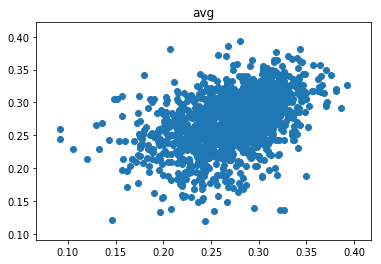

0.17987194251531402


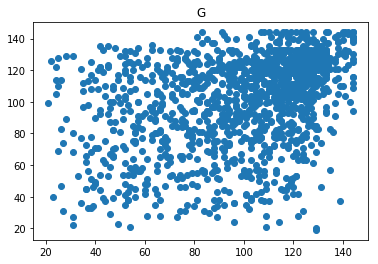

0.14796062415034467


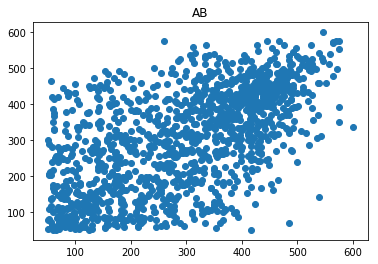

0.36023294084805385


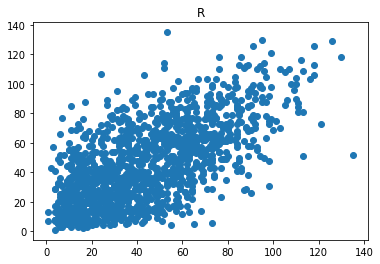

0.42490694253781364


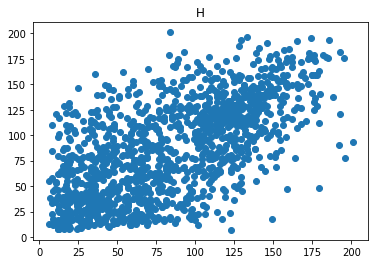

0.4002197195143025


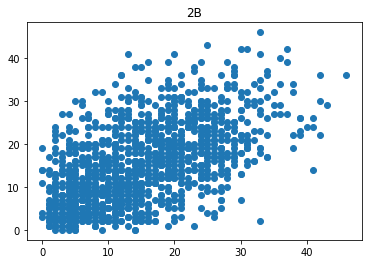

0.3216523588655753


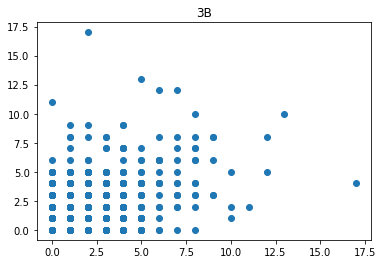

0.2001112514921482


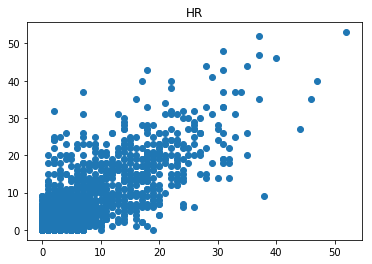

0.5505976292944422


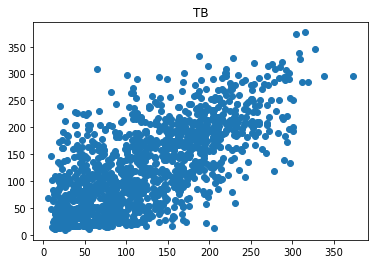

0.4501791511519686


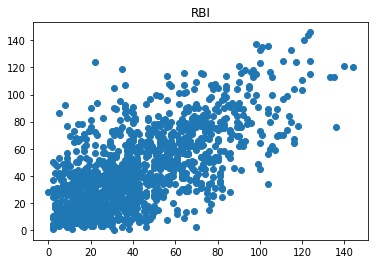

0.4591777705797566


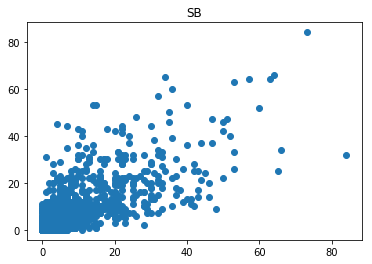

0.5112843817065361


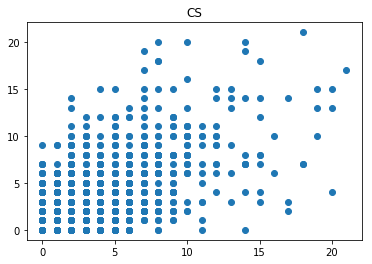

0.3294028563165095


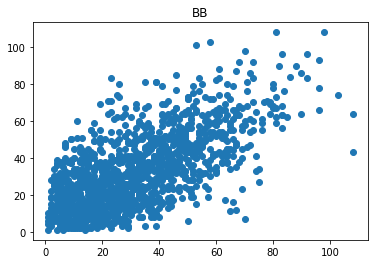

0.4540205212597894


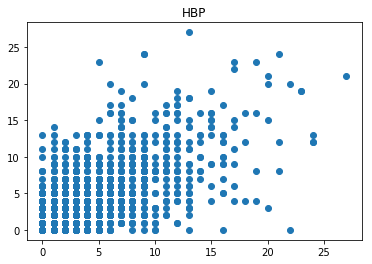

0.3079942963187538


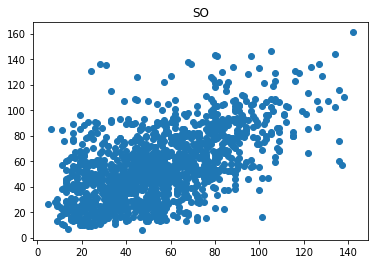

0.3266394990670342


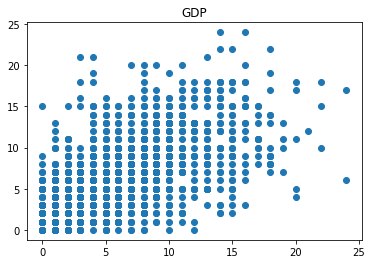

0.2842618874640301


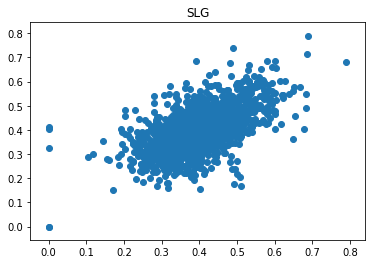

0.34842613998481037


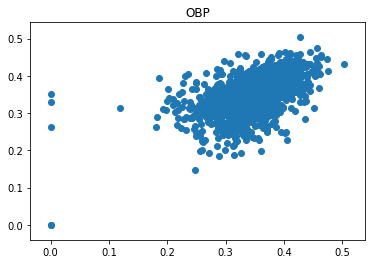

0.25601659738563093


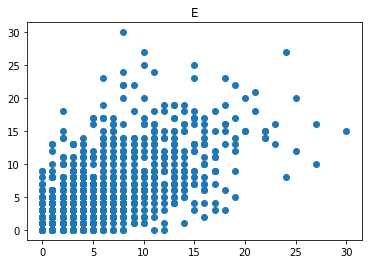

0.38461957015223464


In [30]:
for f in ['avg', 'G', 'AB', 'R', 'H', '2B', '3B','HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP', 'SLG', 'OBP','E']:
    get_self_corr(f,data_temp)

## Position, team

In [19]:
def categorical_variables(data, features):
    data = dummy_feature(data, features)
    return data

In [20]:
cat_features = ['position1','position2','team']
data_temp = categorical_variables(data_temp, cat_features)

In [21]:
data_temp.head()

,batter_name,year,team,avg,G,AB,R,H,2B,3B,...,team_넥센,team_두산,team_롯데,team_삼성,team_쌍방울,team_우리,team_한화,team_해태,team_현대,team_히어로즈
0,가르시아,2018,LG,0.339,50,183,27,62,9,0,...,0,0,0,0,0,0,0,0,0,0
1,강경학,2011,한화,0.000,2,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,강경학,2014,한화,0.221,41,86,11,19,2,3,...,0,0,0,0,0,0,1,0,0,0
3,강경학,2015,한화,0.257,120,311,50,80,7,4,...,0,0,0,0,0,0,1,0,0,0
4,강경학,2016,한화,0.158,46,101,16,16,3,2,...,0,0,0,0,0,0,1,0,0,0


## Missing value

**나머지 결측값은 모두 0으로 처리한다.**
- 이유는 타수가 0 이여서 OPS,SLG(장타율)는 0이고 OBP(출루율)는 타수가 아닌 사유로 생기는 경우가 있기 때문에 NaN이 아닌 값도 있다.
- 출루율이 1인경우는 볼넷

In [ ]:
features = ['avg','G','AB','R','H','2B','3B','HR','TB','RBI','SB','CS','BB','HBP','SO','GDP','SLG','OBP','E','OPS']
data_temp[data_temp.SLG.isnull() | data_temp.OBP.isnull()].loc[:,features]

In [ ]:
def OPS_nan_(data):
    data = data.fillna(0)
    return data

In [ ]:
data_temp = OPS_nan_(data_temp)

## Drop feature

In [ ]:
# drop_features = ['team','position','career']
# data_temp = data_temp.drop(drop_features, axis=1)